In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

Using TensorFlow backend.


In [2]:
max_features = 10000
max_length = 500      # cut off texts after this many word
batch_size = 32

In [3]:
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [4]:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen = max_length)
input_test = sequence.pad_sequences(input_test, maxlen = max_length)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [5]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense

In [6]:
from keras.optimizers import RMSprop

In [8]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length = max_length))
model.add(Conv1D(32, 7, activation = 'relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation = 'relu'))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(1))

model.compile(optimizer = RMSprop(1e-4),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 18, 32)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 577       
Total para

In [9]:
history = model.fit(input_train, y_train, validation_split = 0.2,
                    epochs = 10, batch_size = 128)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 135s 7ms/step - loss: 1.2282 - acc: 0.5013 - val_loss: 0.6901 - val_acc: 0.5312
Epoch 2/10
20000/20000 [==============================] - 130s 7ms/step - loss: 0.6827 - acc: 0.5737 - val_loss: 0.6841 - val_acc: 0.5704
Epoch 3/10
20000/20000 [==============================] - 132s 7ms/step - loss: 0.6637 - acc: 0.6423 - val_loss: 0.6690 - val_acc: 0.6218
Epoch 4/10
20000/20000 [==============================] - 135s 7ms/step - loss: 0.6270 - acc: 0.7107 - val_loss: 0.6158 - val_acc: 0.7054
Epoch 5/10
20000/20000 [==============================] - 132s 7ms/step - loss: 0.5323 - acc: 0.7807 - val_loss: 0.5101 - val_acc: 0.7628
Epoch 6/10
20000/20000 [==============================] - 146s 7ms/step - loss: 0.4106 - acc: 0.8416 - val_loss: 0.4391 - val_acc: 0.8330
Epoch 7/10
20000/20000 [==============================] - 141s 7ms/step - loss: 0.3440 - acc: 0.8597 - val_loss: 0.4395 - v

In [10]:
model.save_weights('IMDB-1D-CNN.h5')

In [13]:
import matplotlib.pyplot as plt

In [11]:
def history_plot(history):
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc)+1)

    plt.plot(epochs, loss, 'k', label = 'Training Loss')
    plt.plot(epochs, val_loss, ':r', label = 'Valdiation Loss')
    plt.legend()
    plt.title('Loss')
    plt.show()
    
    plt.plot(epochs, acc, '-k', label = 'Training Acc')
    plt.plot(epochs, val_acc, ':r', label = 'Validation Acc')
    plt.legend()
    plt.title('Accuracy')
    plt.show()

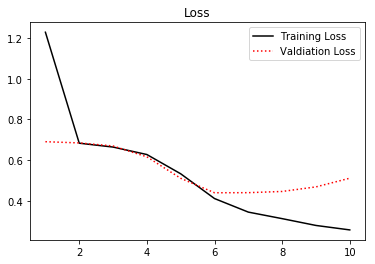

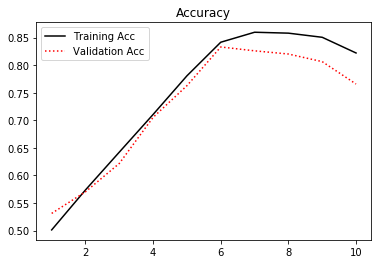

In [14]:
history_plot(history)

In [15]:
model.evaluate(input_test, y_test)

25000/25000 [==============================] - 54s 2ms/step


[0.4802237790679932, 0.766]